# scTOP Vignettes

In [1]:
# Load libraries
import sctop as top
import pandas as pd
import numpy as np
import scanpy as sc
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from collections import Counter
import plotly.io as pio
%load_ext autoreload
%autoreload 1
%aimport SimilarityHelper
%aimport TopObject
%aimport CriticalityHelper
pio.renderers.default = 'notebook'

## Load MC-KO Basis
#### Created by Michael Herriges for the Kotton Lab

In [35]:
mouseBasis = SimilarityHelper.loadMCKOBasis()
mouseBasis

Loading...


/restricted/projectnb/crem-trainees/Kotton_Lab/Eitan/Transdifferentiating-AT2/SimilarityHelper.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MC-KO Dendritic,MC-KO Conventional Dendritic,MC-KO Stromal,MC-KO T,MC-KO B,MC-KO Nuocyte,MC-KO Alveolar Macrophage,MC-KO Interstitial Macrophage,MC-KO Plasmacytoid Dendritic,MC-KO Endothelial,MC-KO Neutrophil Granulocyte,MC-KO NK,MC-KO Eosinophil Granulocyte,MC-KO Dividing T,MC-KO AT1,MC-KO AT2,MC-KO Ciliated,MC-KO Club,MC-KO Basal
0610005C13Rik,-0.363237,-0.420853,-0.489457,-0.420707,-0.463180,-0.339525,-0.473518,-0.386257,-0.385719,-0.416742,-0.216604,-0.392008,-0.335257,-0.273888,-0.930014,-0.491321,-0.388592,-0.491472,-0.785004
0610009B22Rik,1.222499,0.876963,1.182672,0.564469,0.884526,1.424294,1.230700,1.286765,1.053454,1.072092,0.993211,0.608758,-0.335257,1.292429,1.056622,0.808241,0.881634,1.142030,0.187124
0610009O20Rik,1.052874,0.555854,1.303414,0.715321,0.989996,0.759492,0.776047,0.686271,1.085328,1.685823,1.256989,0.755674,1.048591,-0.273888,0.357335,0.408575,0.178013,0.318675,0.693672
0610010F05Rik,0.603993,0.852842,1.196327,0.673758,0.505976,1.001539,0.744110,0.755541,0.783363,1.024641,-0.216604,0.711454,1.111274,0.899606,0.506468,0.223322,0.869469,-0.036788,0.012439
0610010K14Rik,-0.363237,-0.420853,0.734301,-0.420707,0.423585,-0.339525,-0.473518,-0.386257,0.679539,-0.416742,-0.216604,-0.392008,-0.335257,-0.273888,0.138330,0.376074,0.337163,0.508141,0.761826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd3,2.398027,2.174460,2.248160,2.490355,2.475814,2.392160,2.557978,2.318568,2.210577,2.437673,2.076951,2.246495,2.131188,2.351121,2.255261,2.495104,2.483252,2.468912,2.341466
mt-Nd4,2.706183,2.612577,3.198280,2.850854,2.803735,2.774421,3.492480,2.759112,2.596728,3.128885,2.540797,2.641999,2.494822,2.828325,3.155782,3.070886,3.220304,3.102210,3.003629
mt-Nd4l,-0.363237,-0.420853,-0.489457,-0.420707,-0.463180,-0.339525,-0.473518,-0.386257,-0.385719,-0.416742,-0.216604,-0.392008,-0.335257,-0.273888,2.065844,2.279742,2.124668,2.335289,1.966904
mt-Nd5,2.598674,2.583376,2.612577,2.744423,2.777563,2.698481,2.992723,2.631228,2.457661,2.744423,2.379536,2.633358,2.681108,2.604571,2.317275,2.542974,2.480343,2.597494,2.362726


In [57]:
datasets = ["Kostas", "Riemondy", "Choi", "Kobayashi", "Bibek", "Rawlins", "Habermann", "Tsukui", "Burgess", "Kathiriya"]
datasetMap = {}
for name in datasets:
    datasetMap[name] = TopObject.getDatasetSpecificInfo(name)
datasetDF = pd.DataFrame(datasetMap)
datasetDF

,Kostas,Riemondy,Choi,Kobayashi,Bibek,Rawlins,Habermann,Tsukui,Burgess,Kathiriya
0,cell_type_epithelial_mesenchymal_final,labeled_clusters,celltype_4,cell_type,annotation_update,new_celltype,celltype,celltype,new_cluster,celltypes
1,"[AT1, AT2, AT2 activated, Proliferating, Trans...","[Basal, Injured Type II, Naive Type I, Naive T...","[AT1, AT2, Primed, Intermediate, Cycling AT2]","[AEC1, AEC2, Ctgf+, AEC2-proliferating, Lgals3+]","[AT1, AT2, Krt8 high AT2, Activated AT2, Cilia...","[AT1, AT2, Krt8 high AT2, Activated AT2, Cilia...","[AT1, AT2, KRT5-/KRT17+, Proliferating Epithel...",[],"[CASP4+ cells, Differentiating iAT2/iAT1, Earl...","[0, 1, 2, 3, 4, 5, 6]"
2,[],[],[],[],[],[],[],[],[],[]
3,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...,/restricted/projectnb/crem-trainees/Kotton_Lab...
4,None,None,None,None,days,None,None,None,None,None
5,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,None,None,None,None,None,None,None,None,None,None


In [58]:
datasetDF.to_csv("./DatasetInformation.csv")

In [42]:
mouseBasis['MC-KO AT2'].corr(mouseBasis['MC-KO Endothelial'])

np.float64(0.7162810542991895)

## Load New Dataset

In [2]:
riemondyObj = TopObject.TopObject("Riemondy", manualInit=False)

Creating df...
Processing scTOP data...
Done!


In [56]:
import inspect
# inspect.getmembers(riemondyObj)

In [5]:
# Project onto basis
riemondyObj.projectOntoBasis(mouseBasis, "MC-KO")
riemondyObj.projections["MC-KO"]

Projecting onto basis...
Finished projecting!


index,ATI1expt1_AAACGGGAGTGTTTGC,ATI1expt1_AAAGTAGGTTCCACTC,ATI1expt1_AACCATGTCGAGAGCA,ATI1expt1_AACTCAGGTAAACCTC,ATI1expt1_AACTCTTCAAGCCCAC,ATI1expt1_AACTCTTGTATAATGG,ATI1expt1_AACTCTTGTCGTTGTA,ATI1expt1_AACTTTCGTAAGGGAA,ATI1expt1_AAGACCTAGATATGCA,ATI1expt1_AAGACCTAGTTAGGTA,...,ATII1expt2_TGGGCGTGTGCGATAG,ATII1expt2_TGGTTAGGTGGCCCTA,ATII1expt2_TGTCCCAAGTCGTACT,ATII1expt2_TGTTCCGAGCCCGAAA,ATII1expt2_TTAACTCCACGAAAGC,ATII1expt2_TTCCCAGCAGCTGTGC,ATII1expt2_TTGAACGGTGATAAGT,ATII1expt2_TTGCCGTGTCTTCAAG,ATII1expt2_TTGCGTCAGGCATGGT,ATII1expt2_TTTATGCTCAGGTAAA
MC-KO Dendritic,0.038549,0.018022,0.051163,0.022537,0.025920,0.037692,0.051312,0.045221,0.052028,0.026655,...,0.034133,0.033719,0.041465,0.028544,0.035627,0.035437,0.037741,0.032667,0.021515,0.016769
MC-KO Conventional Dendritic,-0.026696,-0.003667,-0.027891,-0.019304,-0.006928,-0.009906,-0.033637,-0.011785,-0.018883,-0.025097,...,-0.001940,-0.005339,-0.013856,-0.015344,-0.032360,-0.023174,-0.009427,-0.009675,-0.001909,-0.002775
MC-KO Stromal,0.181628,0.039954,0.048475,0.053073,0.044593,0.058599,0.061280,0.035719,0.060489,0.037202,...,0.046215,0.050501,0.031660,0.061055,0.053869,0.062110,0.038948,0.029617,0.054757,0.021187
MC-KO T,-0.025890,-0.014028,-0.018824,-0.019330,-0.017924,-0.019314,-0.013201,-0.001904,-0.027061,-0.000404,...,-0.020135,-0.025550,-0.007713,-0.037015,-0.018912,-0.027384,-0.020584,-0.015686,-0.018222,-0.013698
MC-KO B,-0.061733,-0.029112,-0.027580,-0.021650,-0.025176,-0.031192,-0.041760,-0.043155,-0.047068,-0.023362,...,-0.019389,-0.027325,-0.046315,-0.032885,-0.044399,-0.034949,-0.037130,-0.043625,-0.018896,-0.021329
MC-KO Nuocyte,0.037887,0.030856,0.021227,0.028462,0.035558,0.038187,0.037155,0.039209,0.043309,0.027320,...,0.040785,0.020995,0.036066,0.036778,0.046129,0.035321,0.038382,0.038903,0.013170,0.018871
MC-KO Alveolar Macrophage,-0.048637,-0.014280,-0.026686,-0.022160,-0.018864,-0.026381,-0.020360,-0.011864,-0.029083,-0.031548,...,-0.037858,-0.035154,-0.046019,-0.052278,-0.054590,-0.038322,-0.042088,-0.041115,-0.055975,-0.034099
MC-KO Interstitial Macrophage,0.005333,0.004377,0.002560,-0.006506,0.015048,0.002417,0.016555,-0.004459,0.003779,-0.006612,...,0.004859,0.013415,0.007310,0.000676,0.014260,0.010246,0.004404,-0.001932,0.004769,0.005883
MC-KO Plasmacytoid Dendritic,0.026314,-0.017185,-0.007562,0.014838,-0.006267,0.005148,-0.007147,0.018156,0.018957,0.007035,...,-0.013012,-0.012583,-0.002432,0.020897,0.001597,-0.000802,-0.005376,-0.007971,0.005210,-0.001278
MC-KO Endothelial,0.003271,0.021718,0.018450,0.030688,0.015523,0.005263,0.005316,0.014806,0.023545,0.022429,...,0.010303,0.020666,0.020018,0.018060,0.019493,0.006799,0.021214,0.030873,0.041058,0.014387


In [7]:
# Set it as a possible basis
riemondyObj.setBasis()
riemondyObj.basis

Setting basis...


100%|██████████| 6/6 [00:02<00:00,  2.41it/s]


Basis set!


labeled_clusters,Injured Type II,Naive Type II,Transdifferentiating Type II,Basal,Cell Cycle Arrest Type II,Club
gene,,,,,,
Xkr4,-0.780152,-0.654921,-0.626833,-0.666503,-0.685234,0.002731
Gm1992,-0.780152,-0.654921,-0.626833,-0.666503,-0.685234,-0.735824
Gm37381,-0.780152,-0.654921,-0.626833,-0.666503,-0.685234,-0.735824
Rp1,-0.780152,-0.654921,-0.626833,0.137767,-0.685234,0.085871
Rp1.1,-0.780152,-0.654921,-0.626833,-0.666503,-0.685234,-0.735824
...,...,...,...,...,...,...
AC168977.1,0.000806,-0.654921,0.215122,0.246983,0.056162,0.374894
PISD,1.716869,1.771134,1.701821,1.616915,1.675740,1.857917
DHRSX,1.409994,1.335694,1.394560,1.189733,1.330578,1.246019


In [34]:
riemondyObj.basis['Naive Type II'].corr(riemondyObj.basis['Cell Cycle Arrest Type II'])

np.float64(0.9361976760216044)

In [44]:
# View metadata
riemondyObj.metadata[riemondyObj.cellTypeColumn].value_counts()

labeled_clusters
Injured Type II                 8730
Naive Type II                    616
Transdifferentiating Type II     350
Basal                            332
Cell Cycle Arrest Type II        309
Club                             309
Proliferating Type II            119
Macrophages                      108
Endothelial                       77
Naive Type I                      51
Ciliary                           19
Name: count, dtype: int64

## Plot source dataset against basis

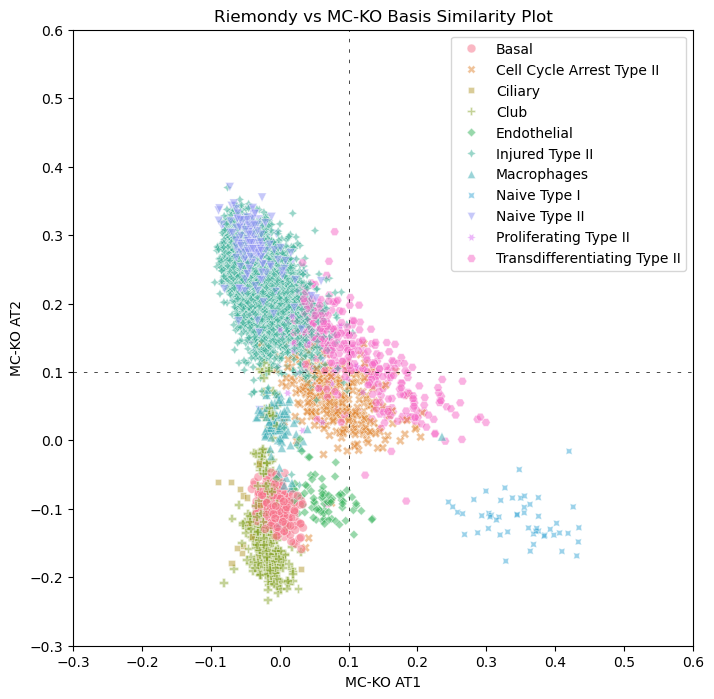

In [11]:
# Make 2D plot against basis
fig, ax = plt.subplots(1, 1, figsize=(8,8))
axis1 = 'MC-KO AT1'
axis2 = 'MC-KO AT2'

SimilarityHelper.plot_two(riemondyObj.projections["MC-KO"],
         axis1, axis2,
         ax=ax, hue=riemondyObj.annotations,
         s=40, style=riemondyObj.annotations,
         minSimilarity=-0.3, maxSimilarity=0.6
)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Riemondy vs MC-KO Basis Similarity Plot")
# plt.savefig('Riemondy AT1 vs AT2.png')
plt.show()

In [ ]:
# Filter Top object using toKeep attribute hardcoded for Riemondy
riemondyObj.filterAnnObject(keep=True)
# Initialize the rest of the object again now that it's changed so much


In [20]:
# riemondyObj.projections["MC-KO"].loc[:, includeCriteria]
riemondyObj.annotations

index
ATI1expt1_AAACGGGAGTGTTTGC         Endothelial
ATI1expt1_AAAGTAGGTTCCACTC               Basal
ATI1expt1_AACCATGTCGAGAGCA               Basal
ATI1expt1_AACTCAGGTAAACCTC                Club
ATI1expt1_AACTCTTCAAGCCCAC               Basal
                                    ...       
ATII1expt2_TTCCCAGCAGCTGTGC      Naive Type II
ATII1expt2_TTGAACGGTGATAAGT      Naive Type II
ATII1expt2_TTGCCGTGTCTTCAAG      Naive Type II
ATII1expt2_TTGCGTCAGGCATGGT      Naive Type II
ATII1expt2_TTTATGCTCAGGTAAA    Injured Type II
Name: labeled_clusters, Length: 11020, dtype: category
Categories (11, object): ['Basal', 'Cell Cycle Arrest Type II', 'Ciliary', 'Club', ..., 'Naive Type I', 'Naive Type II', 'Proliferating Type II', 'Transdifferentiating Type II']

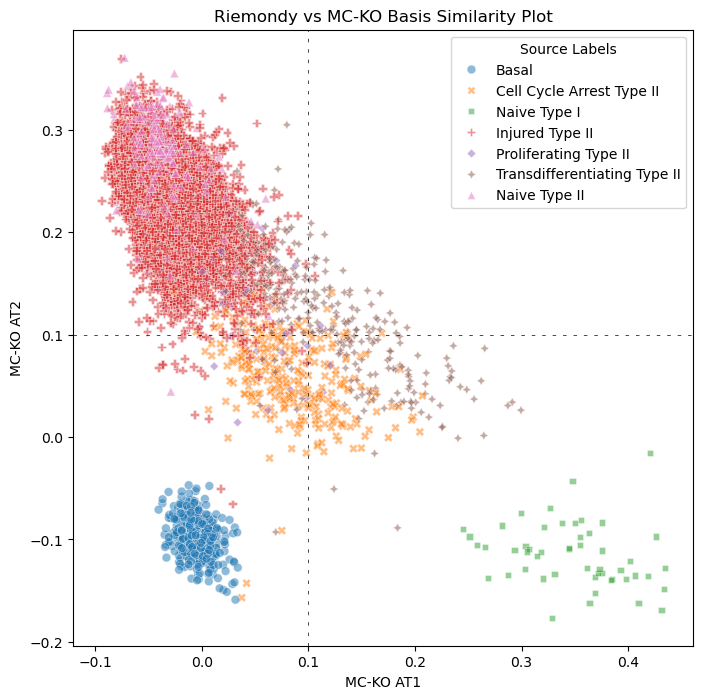

In [20]:
# Filter just the annotations and projections
includeCriteria = riemondyObj.annotations.isin(riemondyObj.toKeep)

# Now plot with just the preset of features we care about
fig, ax = plt.subplots(1, 1, figsize=(8,8))
axis1 = 'MC-KO AT1'
axis2 = 'MC-KO AT2'
SimilarityHelper.plot_two(riemondyObj.projections["MC-KO"],
         axis1, axis2,
         ax=ax,
         annotations=riemondyObj.annotations, includeCriteria=includeCriteria
)

plt.title("Riemondy vs MC-KO Basis Similarity Plot")
# plt.savefig('/Your/Path/Here.png')
plt.show()

## Now repeat with specified bounds

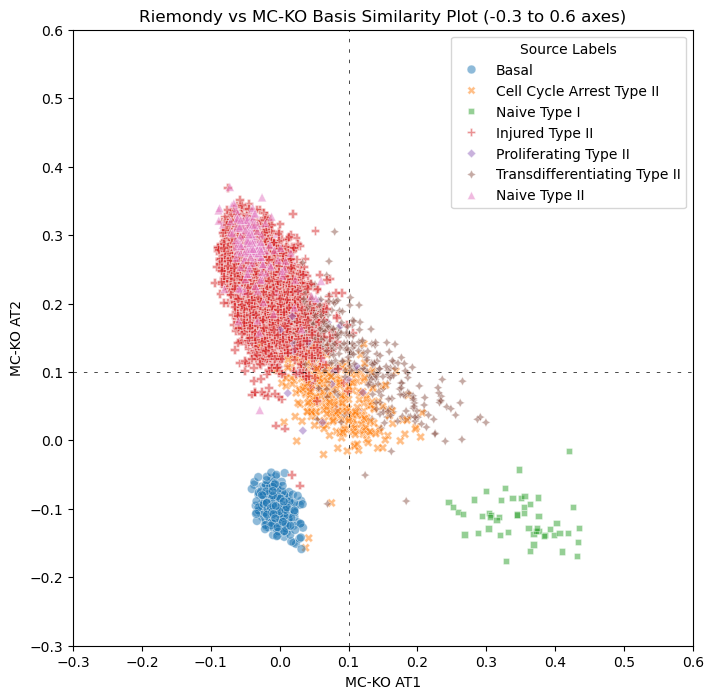

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
SimilarityHelper.plot_two(riemondyObj.projections["MC-KO"],
         axis1, axis2,
         ax=ax, annotations=riemondyObj.annotations, includeCriteria=includeCriteria,
         similarityBounds = (-0.3, 0.6)
)

plt.title("Riemondy vs MC-KO Basis Similarity Plot (-0.3 to 0.6 axes)")
# plt.savefig('/Your/Path/Here.png')
plt.show()

## Load new dataset and plot against this dataset

In [45]:
strunzObj = TopObject.TopObject("Strunz", manualInit=False)

Setting AnnData object...
Setting metadata...
Setting df...
Processing scTOP data...
Done!


In [46]:
strunzObj.setBasis()
strunzObj.basis.corr()

Setting basis...


100%|██████████| 12/12 [00:05<00:00,  2.11it/s]


Basis set!


cell_type,AT2,AT2 activated,Ciliated activated,Ciliated,Krt8+ ADI,Club,Club activated,MHC-II+ Club,Goblet,AT1,Mki67+ Proliferation,Club to ciliated
cell_type,,,,,,,,,,,,
AT2,1.000000,0.957794,0.896318,0.891357,0.925254,0.941335,0.933775,0.939744,0.919124,0.939856,0.933459,0.902999
AT2 activated,0.957794,1.000000,0.894423,0.881250,0.933991,0.931563,0.936740,0.933634,0.916207,0.935046,0.935745,0.898444
Ciliated activated,0.896318,0.894423,1.000000,0.964351,0.889490,0.909044,0.913108,0.931634,0.906717,0.884201,0.877126,0.951317
Ciliated,0.891357,0.881250,0.964351,1.000000,0.877113,0.907386,0.902084,0.921397,0.897376,0.880630,0.869900,0.950950
Krt8+ ADI,0.925254,0.933991,0.889490,0.877113,1.000000,0.918371,0.922759,0.926094,0.911740,0.933875,0.922182,0.889795
Club,0.941335,0.931563,0.909044,0.907386,0.918371,1.000000,0.957004,0.949378,0.947549,0.932736,0.925682,0.932384
Club activated,0.933775,0.936740,0.913108,0.902084,0.922759,0.957004,1.000000,0.950862,0.949038,0.927345,0.934279,0.932971
MHC-II+ Club,0.939744,0.933634,0.931634,0.921397,0.926094,0.949378,0.950862,1.000000,0.948569,0.928304,0.929937,0.933016
Goblet,0.919124,0.916207,0.906717,0.897376,0.911740,0.947549,0.949038,0.948569,1.000000,0.915318,0.916629,0.923474


In [48]:
riemondyObj.basis.corr()

labeled_clusters,Injured Type II,Naive Type II,Transdifferentiating Type II,Basal,Cell Cycle Arrest Type II,Club
labeled_clusters,,,,,,
Injured Type II,1.000000,0.962037,0.953750,0.898525,0.946725,0.916344
Naive Type II,0.962037,1.000000,0.952043,0.896597,0.936198,0.905171
Transdifferentiating Type II,0.953750,0.952043,1.000000,0.901097,0.950877,0.906176
Basal,0.898525,0.896597,0.901097,1.000000,0.915455,0.937400
Cell Cycle Arrest Type II,0.946725,0.936198,0.950877,0.915455,1.000000,0.917310
Club,0.916344,0.905171,0.906176,0.937400,0.917310,1.000000


In [49]:
kostasObj = TopObject.TopObject("Kostas", manualInit=False)
kostasObj.setBasis()

Setting AnnData object...
Setting metadata...
Setting df...
Processing scTOP data...
Done!
Setting basis...


100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


Basis set!


In [51]:
4-3

1

In [50]:
kostasObj.basis.corr()

cell_type_epithelial_mesenchymal_final,Sfrp1/Lcn2 Fibroblast,Alveolar,Fibrotic,Adventitial,Pericytes,Peribronchial,AT1,Smooth Muscle,Transitional epithelial,AT2 activated,Proliferating,AT2,Mesothelial
cell_type_epithelial_mesenchymal_final,,,,,,,,,,,,,
Sfrp1/Lcn2 Fibroblast,1.000000,0.967197,0.966355,0.952544,0.931702,0.951245,0.886681,0.928329,0.886195,0.878202,0.952769,0.853950,0.912469
Alveolar,0.967197,1.000000,0.943335,0.947764,0.922756,0.936335,0.879853,0.921989,0.874763,0.868608,0.931946,0.855056,0.908991
Fibrotic,0.966355,0.943335,1.000000,0.934619,0.924457,0.950316,0.878354,0.917811,0.879203,0.868456,0.947334,0.843160,0.901212
Adventitial,0.952544,0.947764,0.934619,1.000000,0.916935,0.935622,0.878972,0.924559,0.874727,0.866670,0.928314,0.848168,0.919424
Pericytes,0.931702,0.922756,0.924457,0.916935,1.000000,0.925849,0.880625,0.930118,0.875850,0.865498,0.918751,0.846221,0.894223
Peribronchial,0.951245,0.936335,0.950316,0.935622,0.925849,1.000000,0.881558,0.934221,0.880078,0.869215,0.933475,0.849575,0.906662
AT1,0.886681,0.879853,0.878354,0.878972,0.880625,0.881558,1.000000,0.885192,0.940313,0.930065,0.875568,0.906645,0.895794
Smooth Muscle,0.928329,0.921989,0.917811,0.924559,0.930118,0.934221,0.885192,1.000000,0.878785,0.869920,0.912682,0.853425,0.904420
Transitional epithelial,0.886195,0.874763,0.879203,0.874727,0.875850,0.880078,0.940313,0.878785,1.000000,0.946713,0.876576,0.919474,0.889819


## Combine these bases and test yet another dataset against them